In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Import cab rides dataset
cab_rides_path = r"/content/cab_rides.csv"
df_rides = pd.read_csv(cab_rides_path)

# Import weather dataset
weather_path = r"/content/weather.csv"
df_weather = pd.read_csv(weather_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
df_rides

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [23]:
df_weather

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [24]:
# Unifing timestamp format and turn to datetime
df_rides['date_time'] = pd.to_datetime(df_rides['time_stamp']/1000, unit='s')
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#Merging info location-date-hour wise
df_rides['loc_date_hr'] = df_rides['source'].astype(str) + " - " + df_rides['date_time'].dt.date.astype(str) + " - " + df_rides['date_time'].dt.hour.astype(str)
df_weather['loc_date_hr'] = df_weather['location'].astype(str) + " - " + df_weather['date_time'].dt.date.astype(str) + " - " + df_weather['date_time'].dt.hour.astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
df_weather

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time,loc_date_hr
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,Back Bay - 2018-12-16 - 23
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,Beacon Hill - 2018-12-16 - 23
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,Boston University - 2018-12-16 - 23
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,Fenway - 2018-12-16 - 23
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,Financial District - 2018-12-16 - 23
...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,2018-12-03 06:52:54,North Station - 2018-12-03 - 6
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,Northeastern University - 2018-12-03 - 6
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,South Station - 2018-12-03 - 6
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,Theatre District - 2018-12-03 - 6


In [27]:
#Grouping the weather by the location and datetime and updating corresponding parameters with mean value.
weather = df_weather.groupby(['loc_date_hr']).agg({'temp': 'mean', 'clouds': 'mean', 'pressure': 'mean', 'rain': 'mean', 'humidity': 'mean', 'wind': 'mean'}).reset_index()
weather['location'] = df_weather.groupby(['loc_date_hr'])['location'].first().values
weather.index = weather['loc_date_hr']
weather['rain'].fillna(0,inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#Merging the both dataset into one using on 'loc_date_hr'
merged_df = df_rides.join(weather,on=['loc_date_hr'],rsuffix ='_w')
merged_df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
#getting hour as separate feature
merged_df['hour'] = merged_df['date_time'].dt.hour.astype(int)
def categorize_time(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 22:
        return 'Night'
    elif hour == 23 or hour == 0 or hour == 1:
        return 'Late Night'
    elif 2 <= hour <= 5:
        return 'Late Night'

merged_df['day_time'] = merged_df['hour'].apply(categorize_time)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
merged_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          635242 non-null  float64       
 1   cab_type          635242 non-null  object        
 2   time_stamp        635242 non-null  int64         
 3   destination       635242 non-null  object        
 4   source            635242 non-null  object        
 5   price             635242 non-null  float64       
 6   surge_multiplier  635242 non-null  float64       
 7   id                635242 non-null  object        
 8   product_id        635242 non-null  object        
 9   name              635242 non-null  object        
 10  date_time         635242 non-null  datetime64[ns]
 11  loc_date_hr       635242 non-null  object        
 12  loc_date_hr_w     635242 non-null  object        
 13  temp              635242 non-null  float64       
 14  clouds   

In [31]:
merged_df.drop(columns=['id','product_id','time_stamp','location','date_time','loc_date_hr','loc_date_hr_w','hour'],axis=1,inplace=True)
merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,distance,cab_type,destination,source,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,day_time
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.460,0.290000,1022.25,0.000,0.760000,7.68,Morning
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,44.065,0.995000,1002.88,0.106,0.895000,12.63,Late Night
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,35.080,0.000000,1013.71,0.000,0.700000,5.25,Late Night
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.680,0.433333,998.42,0.000,0.706667,11.16,Late Night
5,0.44,Lyft,North Station,Haymarket Square,16.5,1.0,Lux Black,40.780,0.930000,1000.15,0.000,0.790000,7.55,Night


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


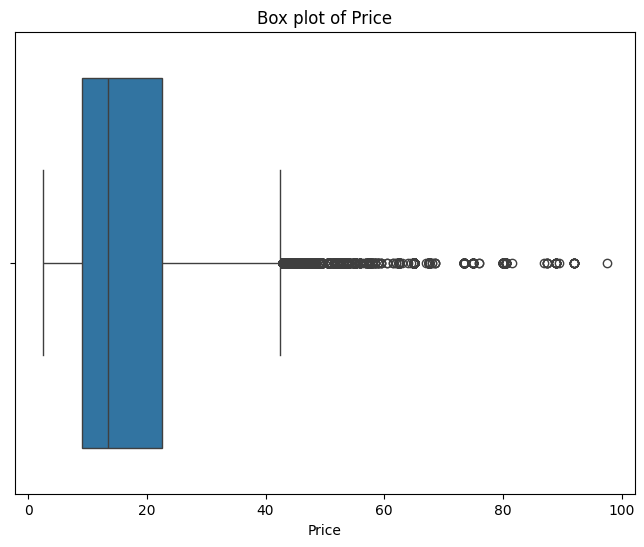

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the distribution of the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

In [33]:
# Calculate the first and third quartiles
Q1 = merged_df['price'].quantile(0.25)
Q3 = merged_df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_df = merged_df[(merged_df['price'] >= lower_bound) & (merged_df['price'] <= upper_bound)]

# Display the filtered DataFrame without outliers
print("Original DataFrame shape:", merged_df.shape)
print("Filtered DataFrame shape (without outliers):", filtered_df.shape)

Original DataFrame shape: (635242, 14)
Filtered DataFrame shape (without outliers): (629676, 14)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-2978552965ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')


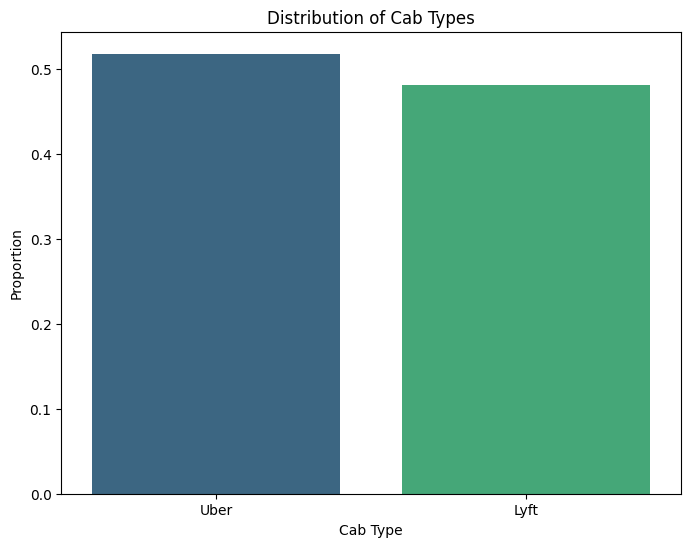

Percentage of Uber rides: 51.81
Percentage of Lyft rides: 48.19


In [34]:
# Check the distribution of the target variable
target_distribution = merged_df['cab_type'].value_counts(normalize=True)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title('Distribution of Cab Types')
plt.xlabel('Cab Type')
plt.ylabel('Proportion')
plt.show()

# Print the distribution percentages
print("Percentage of Uber rides:", round(target_distribution['Uber'] * 100, 2))
print("Percentage of Lyft rides:", round(target_distribution['Lyft'] * 100, 2))

In [35]:
#Separating Cab services into Lyft and Uber
# Subsetting dataframe into uber and lyft
df_lyft = merged_df[merged_df['cab_type']=='Lyft'].copy()
df_uber = merged_df[merged_df['cab_type']=='Uber'].copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#Separating features and target
X_lyft = df_lyft.drop('price',axis=1)
y_lyft = df_lyft['price'].copy()

X_uber = df_uber.drop('price',axis=1)
y_uber = df_uber['price'].copy()
X_lyft.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,distance,cab_type,destination,source,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,day_time
0,0.44,Lyft,North Station,Haymarket Square,1.0,Shared,38.460,0.290000,1022.25,0.000,0.760000,7.68,Morning
1,0.44,Lyft,North Station,Haymarket Square,1.0,Lux,44.065,0.995000,1002.88,0.106,0.895000,12.63,Late Night
3,0.44,Lyft,North Station,Haymarket Square,1.0,Lux Black XL,35.080,0.000000,1013.71,0.000,0.700000,5.25,Late Night
4,0.44,Lyft,North Station,Haymarket Square,1.0,Lyft XL,37.680,0.433333,998.42,0.000,0.706667,11.16,Late Night
5,0.44,Lyft,North Station,Haymarket Square,1.0,Lux Black,40.780,0.930000,1000.15,0.000,0.790000,7.55,Night


In [37]:
# Creating preprocessing pipeline
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Converting data into machine understandable language
str_attributes = ["cab_type", "destination", "source", "name", "day_time"]
num_attributes = ["distance", "temp", "clouds", "pressure", "rain", "humidity", "wind","surge_multiplier"]

pipeline = ColumnTransformer([
        ("str", OneHotEncoder(drop="first"), str_attributes),
        ("num", StandardScaler(), num_attributes),])

pipeline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ColumnTransformer(transformers=[('str', OneHotEncoder(drop='first'),
                                 ['cab_type', 'destination', 'source', 'name',
                                  'day_time']),
                                ('num', StandardScaler(),
                                 ['distance', 'temp', 'clouds', 'pressure',
                                  'rain', 'humidity', 'wind',
                                  'surge_multiplier'])])

In [38]:
from sklearn.model_selection import train_test_split
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(X_lyft, y_lyft, test_size=0.2, random_state=42)

X_train_lyft_prepared = pipeline.fit_transform(X_train_lyft)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
model = make_pipeline(pipeline,RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train_lyft, y_train_lyft)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('str',
                                                  OneHotEncoder(drop='first'),
                                                  ['cab_type', 'destination',
                                                   'source', 'name',
                                                   'day_time']),
                                                 ('num', StandardScaler(),
                                                  ['distance', 'temp', 'clouds',
                                                   'pressure', 'rain',
                                                   'humidity', 'wind',
                                                   'surge_multiplier'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict and calculate the metrics
y_pred = model.predict(X_test_lyft)

# Calculate Mean Squared Error and then take the square root for RMSE
mse = mean_squared_error(y_test_lyft, y_pred)
rmse = np.sqrt(mse)

# Calculate R^2 Score
r2 = r2_score(y_test_lyft, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 2.0714286547822067
Root Mean Squared Error: 1.4392458632152487
R^2 Score: 0.9792396362494343


In [41]:
# Now, you can properly split the data
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(X_uber, y_uber, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Transform the training data using the same pipeline as Lyft
X_train_uber_prepared = pipeline.fit_transform(X_train_uber)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# Using the same RandomForestRegressor for Uber
from sklearn.ensemble import RandomForestRegressor
model_uber = make_pipeline(pipeline, RandomForestRegressor(n_estimators=100, random_state=42))
model_uber.fit(X_train_uber, y_train_uber)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('str',
                                                  OneHotEncoder(drop='first'),
                                                  ['cab_type', 'destination',
                                                   'source', 'name',
                                                   'day_time']),
                                                 ('num', StandardScaler(),
                                                  ['distance', 'temp', 'clouds',
                                                   'pressure', 'rain',
                                                   'humidity', 'wind',
                                                   'surge_multiplier'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [44]:
# Predicting the prices for Uber
y_pred_uber = model_uber.predict(X_test_uber)

# Calculate Mean Squared Error and RMSE for Uber
mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)

# Calculate R^2 Score for Uber
r2_uber = r2_score(y_test_uber, y_pred_uber)

print(f"Uber - Mean Squared Error: {mse_uber}")
print(f"Uber - Root Mean Squared Error: {rmse_uber}")
print(f"Uber - R^2 Score: {r2_uber}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Uber - Mean Squared Error: 4.416493075892113
Uber - Root Mean Squared Error: 2.1015454018155575
Uber - R^2 Score: 0.9397382499751846


In [45]:
# By using gradientboosting model
from sklearn.ensemble import GradientBoostingRegressor

# Assuming your existing pipeline 'pipeline' is already defined and includes preprocessing

# Create a new model with GradientBoostingRegressor
model_gbr = make_pipeline(pipeline, GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

# Training the model with Lyft data as an example
model_gbr.fit(X_train_lyft, y_train_lyft)
# Predicting the prices for Lyft
y_pred_lyft_gbr = model_gbr.predict(X_test_lyft)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Calculate metrics for Lyft with Gradient Boosting Regressor
mse_lyft_gbr = mean_squared_error(y_test_lyft, y_pred_lyft_gbr)
rmse_lyft_gbr = np.sqrt(mse_lyft_gbr)
r2_lyft_gbr = r2_score(y_test_lyft, y_pred_lyft_gbr)
print(f"Gradient Boosting - Lyft - Mean Squared Error: {mse_lyft_gbr}")
print(f"Gradient Boosting - Lyft - Root Mean Squared Error: {rmse_lyft_gbr}")
print(f"Gradient Boosting - Lyft - R^2 Score: {r2_lyft_gbr}")

Gradient Boosting - Lyft - Mean Squared Error: 2.4424127677320633
Gradient Boosting - Lyft - Root Mean Squared Error: 1.5628220524845633
Gradient Boosting - Lyft - R^2 Score: 0.9755215428877638


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# for Uber
model_gbr.fit(X_train_uber, y_train_uber)
y_pred_uber_gbr = model_gbr.predict(X_test_uber)
mse_uber_gbr = mean_squared_error(y_test_uber, y_pred_uber_gbr)
rmse_uber_gbr = np.sqrt(mse_uber_gbr)
r2_uber_gbr = r2_score(y_test_uber, y_pred_uber_gbr)
print(f"Gradient Boosting - Uber - Mean Squared Error: {mse_uber_gbr}")
print(f"Gradient Boosting - Uber - Root Mean Squared Error: {rmse_uber_gbr}")
print(f"Gradient Boosting - Uber - R^2 Score: {r2_uber_gbr}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gradient Boosting - Uber - Mean Squared Error: 4.525215704681024
Gradient Boosting - Uber - Root Mean Squared Error: 2.127255439452682
Gradient Boosting - Uber - R^2 Score: 0.9382547616586554


#Rain Impact on Uber and Lyft datasets

In [57]:
# Step 1: Create a new DataFrame with relevant columns
weather_impact_df = merged_df[['cab_type', 'destination', 'source', 'name', 'day_time','price', 'rain']].copy()

# Step 2: Separate the data into Uber and Lyft datasets
uber_weather_df = weather_impact_df[weather_impact_df['cab_type'] == 'Uber'].copy()
lyft_weather_df = weather_impact_df[weather_impact_df['cab_type'] == 'Lyft'].copy()
weather_impact_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cab_type     635242 non-null  object 
 1   destination  635242 non-null  object 
 2   source       635242 non-null  object 
 3   name         635242 non-null  object 
 4   day_time     635242 non-null  object 
 5   price        635242 non-null  float64
 6   rain         635242 non-null  float64
dtypes: float64(2), object(5)
memory usage: 38.8+ MB


In [58]:
uber_weather_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cab_type,destination,source,name,day_time,price,rain
12,Uber,West End,North End,UberXL,Night,12.0,0.0000
13,Uber,West End,North End,Black,Morning,16.0,0.0000
14,Uber,West End,North End,UberX,Night,7.5,0.0000
15,Uber,West End,North End,WAV,Late Night,7.5,0.2088
16,Uber,West End,North End,Black SUV,Late Night,26.0,0.0000
...,...,...,...,...,...,...,...
693065,Uber,North End,West End,WAV,Late Night,9.5,0.0000
693066,Uber,North End,West End,UberXL,Late Night,13.0,0.0000
693067,Uber,North End,West End,UberX,Late Night,9.5,0.0000
693069,Uber,North End,West End,Black SUV,Late Night,27.0,0.0000


In [59]:
lyft_weather_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cab_type,destination,source,name,day_time,price,rain
0,Lyft,North Station,Haymarket Square,Shared,Morning,5.0,0.0000
1,Lyft,North Station,Haymarket Square,Lux,Late Night,11.0,0.1060
3,Lyft,North Station,Haymarket Square,Lux Black XL,Late Night,26.0,0.0000
4,Lyft,North Station,Haymarket Square,Lyft XL,Late Night,9.0,0.0000
5,Lyft,North Station,Haymarket Square,Lux Black,Night,16.5,0.0000
...,...,...,...,...,...,...,...
693042,Lyft,Fenway,Theatre District,Lyft XL,Late Night,16.5,0.0013
693043,Lyft,Fenway,Theatre District,Lux,Late Night,22.5,0.0013
693048,Lyft,Fenway,Theatre District,Shared,Late Night,7.0,0.0013
693051,Lyft,Fenway,Theatre District,Lyft,Late Night,10.5,0.0013


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets for Uber
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(uber_weather_df.drop(columns=['price']),
                                                                        uber_weather_df['price'],
                                                                        test_size=0.2, random_state=42)

# Split the data into training and testing sets for Lyft
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(lyft_weather_df.drop(columns=['price']),
                                                                        lyft_weather_df['price'],
                                                                        test_size=0.2, random_state=42)

# Define preprocessing steps
# For simplicity, we'll apply OneHotEncoding to all categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['cab_type', 'destination', 'source', 'name', 'day_time'])
    ],
    remainder='passthrough'
)

# Define Linear Regression model
linear_reg = LinearRegression()

# Create pipeline for Uber
uber_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_reg)
])

# Fit and evaluate Linear Regression model for Uber
uber_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber = uber_pipeline.predict(X_test_uber)

mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("Linear Regression Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber}")
print(f"Root Mean Squared Error: {rmse_uber}")
print(f"R^2 Score: {r2_uber}")

# Create pipeline for Lyft
lyft_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_reg)
])

# Fit and evaluate Linear Regression model for Lyft
lyft_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft = lyft_pipeline.predict(X_test_lyft)

mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
rmse_lyft = np.sqrt(mse_lyft)
r2_lyft = r2_score(y_test_lyft, y_pred_lyft)

print("\nLinear Regression Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft}")
print(f"Root Mean Squared Error: {rmse_lyft}")
print(f"R^2 Score: {r2_lyft}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Linear Regression Metrics for Uber:
Mean Squared Error: 11.415558996212422
Root Mean Squared Error: 3.378691906080284
R^2 Score: 0.8442380524995327

Linear Regression Metrics for Lyft:
Mean Squared Error: 19.443503372774178
Root Mean Squared Error: 4.409478809652471
R^2 Score: 0.8051324617566507


In [61]:
# Define Random Forest Regressor model - LYFT
rf_reg_lyft = RandomForestRegressor(n_estimators=100, random_state=42)

# Create pipeline for Lyft with Random Forest Regressor
lyft_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_reg_lyft)
])

# Fit and evaluate Random Forest Regressor model for Lyft
lyft_rf_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft_rf = lyft_rf_pipeline.predict(X_test_lyft)

mse_lyft_rf = mean_squared_error(y_test_lyft, y_pred_lyft_rf)
rmse_lyft_rf = np.sqrt(mse_lyft_rf)
r2_lyft_rf = r2_score(y_test_lyft, y_pred_lyft_rf)

print("\nRandom Forest Regressor Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft_rf}")
print(f"Root Mean Squared Error: {rmse_lyft_rf}")
print(f"R^2 Score: {r2_lyft_rf}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Random Forest Regressor Metrics for Lyft:
Mean Squared Error: 10.416639821322143
Root Mean Squared Error: 3.227481962973944
R^2 Score: 0.895601892321987


In [62]:
# Random Forest Regressor model - Uber
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest Regressor model
rf_reg_uber = RandomForestRegressor(n_estimators=100, random_state=42)

# Create pipeline for Uber with Random Forest Regressor
uber_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_reg_uber)
])

# Fit and evaluate Random Forest Regressor model for Uber
uber_rf_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber_rf = uber_rf_pipeline.predict(X_test_uber)

mse_uber_rf = mean_squared_error(y_test_uber, y_pred_uber_rf)
rmse_uber_rf = np.sqrt(mse_uber_rf)
r2_uber_rf = r2_score(y_test_uber, y_pred_uber_rf)

print("Random Forest Regressor Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber_rf}")
print(f"Root Mean Squared Error: {rmse_uber_rf}")
print(f"R^2 Score: {r2_uber_rf}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Regressor Metrics for Uber:
Mean Squared Error: 4.733828576776546
Root Mean Squared Error: 2.1757363297919503
R^2 Score: 0.935408300329688


In [63]:
# Define Gradient Boosting Regressor model - LYFT
gb_reg_lyft = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create pipeline for Lyft with Gradient Boosting Regressor
lyft_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_reg_lyft)
])

# Fit and evaluate Gradient Boosting Regressor model for Lyft
lyft_gb_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft_gb = lyft_gb_pipeline.predict(X_test_lyft)

mse_lyft_gb = mean_squared_error(y_test_lyft, y_pred_lyft_gb)
rmse_lyft_gb = np.sqrt(mse_lyft_gb)
r2_lyft_gb = r2_score(y_test_lyft, y_pred_lyft_gb)

print("\nGradient Boosting Regressor Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft_gb}")
print(f"Root Mean Squared Error: {rmse_lyft_gb}")
print(f"R^2 Score: {r2_lyft_gb}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Gradient Boosting Regressor Metrics for Lyft:
Mean Squared Error: 13.239514513246135
Root Mean Squared Error: 3.6386143672071287
R^2 Score: 0.8673103529096534


In [64]:
# Define Gradient Boosting Regressor model - UBER
gb_reg_uber = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create pipeline for Uber with Gradient Boosting Regressor
uber_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_reg_uber)
])

# Fit and evaluate Gradient Boosting Regressor model for Uber
uber_gb_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber_gb = uber_gb_pipeline.predict(X_test_uber)

mse_uber_gb = mean_squared_error(y_test_uber, y_pred_uber_gb)
rmse_uber_gb = np.sqrt(mse_uber_gb)
r2_uber_gb = r2_score(y_test_uber, y_pred_uber_gb)

print("Gradient Boosting Regressor Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber_gb}")
print(f"Root Mean Squared Error: {rmse_uber_gb}")
print(f"R^2 Score: {r2_uber_gb}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gradient Boosting Regressor Metrics for Uber:
Mean Squared Error: 6.67449140707276
Root Mean Squared Error: 2.583503707578675
R^2 Score: 0.9089285263660125


In [65]:
# Define KNN Regressor model - LYFT
knn_reg_lyft = KNeighborsRegressor(n_neighbors=5)

# Create pipeline for Lyft with KNN Regressor
lyft_knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', knn_reg_lyft)
])

# Fit and evaluate KNN Regressor model for Lyft
lyft_knn_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft_knn = lyft_knn_pipeline.predict(X_test_lyft)

mse_lyft_knn = mean_squared_error(y_test_lyft, y_pred_lyft_knn)
rmse_lyft_knn = np.sqrt(mse_lyft_knn)
r2_lyft_knn = r2_score(y_test_lyft, y_pred_lyft_knn)

print("\nKNN Regressor Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft_knn}")
print(f"Root Mean Squared Error: {rmse_lyft_knn}")
print(f"R^2 Score: {r2_lyft_knn}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



KNN Regressor Metrics for Lyft:
Mean Squared Error: 11.632768817889286
Root Mean Squared Error: 3.410684508700458
R^2 Score: 0.8834135505811034


In [66]:
# Define KNN Regressor model - UBER
knn_reg_uber = KNeighborsRegressor(n_neighbors=5)

# Create pipeline for Uber with KNN Regressor
uber_knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', knn_reg_uber)
])

# Fit and evaluate KNN Regressor model for Uber
uber_knn_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber_knn = uber_knn_pipeline.predict(X_test_uber)

mse_uber_knn = mean_squared_error(y_test_uber, y_pred_uber_knn)
rmse_uber_knn = np.sqrt(mse_uber_knn)
r2_uber_knn = r2_score(y_test_uber, y_pred_uber_knn)

print("KNN Regressor Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber_knn}")
print(f"Root Mean Squared Error: {rmse_uber_knn}")
print(f"R^2 Score: {r2_uber_knn}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNN Regressor Metrics for Uber:
Mean Squared Error: 5.278438202588566
Root Mean Squared Error: 2.297485190939991
R^2 Score: 0.9279772620448238


#Time base Demand Analysis

**Regression: Predicting Cab Ride Prices**
- Regression model to predict cab ride prices based on the time of day and day of the week.

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data and create datetime and merging key
df_rides = pd.read_csv('/content/cab_rides.csv')
df_weather = pd.read_csv('/content/weather.csv')
df_rides['date_time'] = pd.to_datetime(df_rides['time_stamp'] / 1000, unit='s')
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')
df_rides['loc_date_hr'] = df_rides['source'].astype(str) + " - " + df_rides['date_time'].dt.date.astype(str) + " - " + df_rides['date_time'].dt.hour.astype(str)
df_weather['loc_date_hr'] = df_weather['location'].astype(str) + " - " + df_weather['date_time'].dt.date.astype(str) + " - " + df_weather['date_time'].dt.hour.astype(str)

# Merge datasets
merged_df = pd.merge(df_rides, df_weather, on='loc_date_hr', suffixes=('_ride', '_weather'))
if 'date_time_ride' in merged_df.columns:
    merged_df.rename(columns={'date_time_ride': 'date_time'}, inplace=True)
elif 'date_time_weather' in merged_df.columns:
    merged_df.rename(columns={'date_time_weather': 'date_time'}, inplace=True)

# Check and handle NaN values in the price column
print(f"Number of NaN values in 'price': {merged_df['price'].isna().sum()}")
merged_df = merged_df.dropna(subset=['price'])  # Dropping rows where 'price' is NaN

# Prepare data
merged_df['hour'] = merged_df['date_time'].dt.hour
merged_df['day_of_week'] = merged_df['date_time'].dt.dayofweek
X = merged_df[['hour', 'day_of_week']]
y = merged_df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Regression MSE: {mse}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of NaN values in 'price': 100679
Regression MSE: 86.34457933043319


**Classification: Predicting Price Categories Based on Time**
 - Classify time periods into categories based on pricing.

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Create price categories
merged_df['price_category'] = pd.qcut(merged_df['price'], 4, labels=False)

# Prepare data
X = merged_df[['hour', 'day_of_week']]
y = merged_df['price_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model_cls = RandomForestClassifier(n_estimators=100, random_state=42)
model_cls.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_cls.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Classification Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Accuracy: 0.262


**Clustering: Identifying Temporal Patterns**
- Use clustering to find patterns in ride demand based on time attributes.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


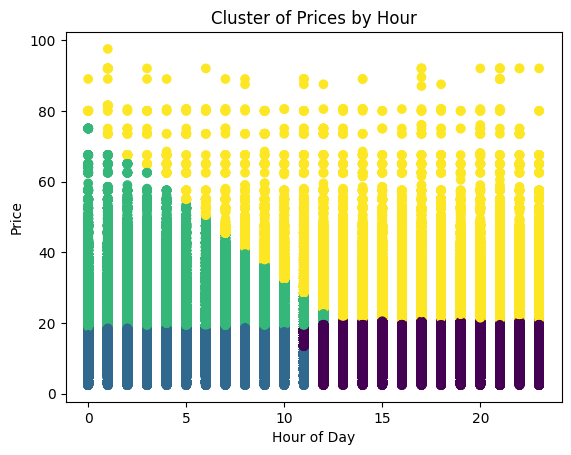

In [73]:
from sklearn.cluster import KMeans

# Select features for clustering
features = merged_df[['hour', 'price']]

# Apply clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)
merged_df['cluster'] = clusters

# Visualize clusters
plt.scatter(merged_df['hour'], merged_df['price'], c=merged_df['cluster'])
plt.xlabel('Hour of Day')
plt.ylabel('Price')
plt.title('Cluster of Prices by Hour')
plt.show()


**Association Rules: Time and Pricing Decisions**
- Discover rules linking time-based variables to pricing.

In [77]:
# Create a column that categorizes hours into periods (morning, afternoon, etc.)
merged_df['time_period'] = pd.cut(merged_df['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
merged_df['high_price'] = (merged_df['price'] > merged_df['price'].median()).map({True: 'High', False: 'Low'})

# Prepare data for TransactionEncoder
transactions = merged_df.groupby(merged_df.index)[['time_period', 'high_price']].agg(lambda x: x.tolist())

# Use TransactionEncoder
te = TransactionEncoder()
trans_encoded = te.fit_transform(transactions['time_period'].values)
df_trans = pd.DataFrame(trans_encoded, columns=te.columns_)

# Apply apriori and association_rules
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display discovered rules
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []


**Outlier Detection: Identifying Anomalies**
- Detect pricing anomalies using isolation forests.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


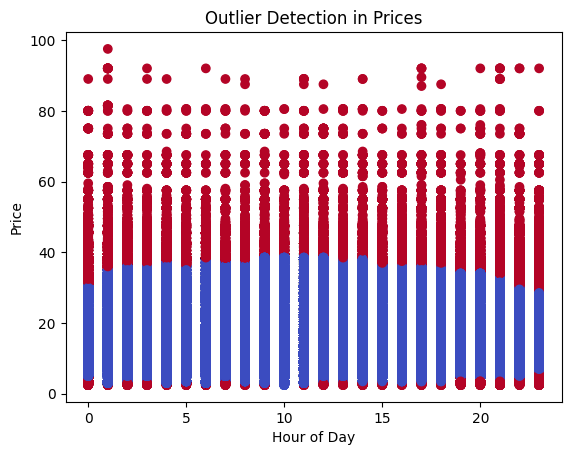

In [76]:
from sklearn.ensemble import IsolationForest

# Detect outliers
iso_forest = IsolationForest(n_estimators=100, contamination=0.05)
outliers = iso_forest.fit_predict(merged_df[['hour', 'price']])

# Mark outliers in the dataset
merged_df['outlier'] = outliers == -1

# Visualize outliers
plt.scatter(merged_df['hour'], merged_df['price'], c=merged_df['outlier'], cmap='coolwarm')
plt.xlabel('Hour of Day')
plt.ylabel('Price')
plt.title('Outlier Detection in Prices')
plt.show()
